In [1]:
from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel
import torch

# if you have CUDA or MPS, set it to the active device like this
device = (
    "cuda"
    if torch.cuda.is_available()
    else ("mps" if torch.backends.mps.is_available() else "cpu")
)
model_id = "openai/clip-vit-base-patch32"

# we initialize a tokenizer, image processor, and the model itself
tokenizer = CLIPTokenizerFast.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id).to(device)

In [2]:
prompt = "a dog in the snow"

# create transformer-readable tokens
inputs = tokenizer(prompt, return_tensors="pt").to(device)
inputs

{'input_ids': tensor([[49406,   320,  1929,   530,   518,  2583, 49407]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [3]:
# use CLIP to encode tokens into a meaningful embedding
text_emb = model.get_text_features(**inputs)
text_emb.shape

torch.Size([1, 512])

In [4]:
text_emb.min(), text_emb.max()

(tensor(-0.9014, device='cuda:0', grad_fn=<MinBackward1>),
 tensor(4.0308, device='cuda:0', grad_fn=<MaxBackward1>))

In [5]:
from PIL import Image

image = processor(
    text=None,
    images=Image.open("saved_images/abomasnow_2058735963577945329.png"),
    return_tensors="pt",
)["pixel_values"].to(device)

In [6]:
image.shape

torch.Size([1, 3, 224, 224])

/tmp/ipykernel_61553/3309829449.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3675.)
  plt.imshow(image.squeeze(0).T.detach().cpu().numpy())
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..2.145897].


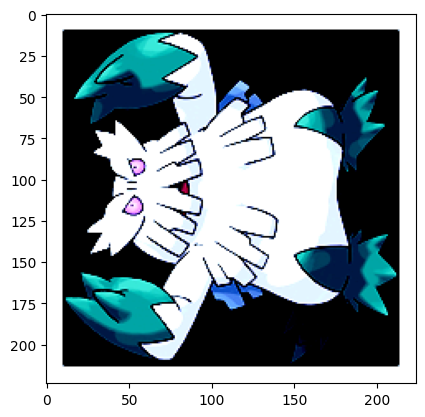

In [7]:
import matplotlib.pyplot as plt
# we can still visualize the processed image

plt.imshow(image.squeeze(0).T.detach().cpu().numpy())

In [8]:
img_emb = model.get_image_features(image)
img_emb.shape

torch.Size([1, 512])

In [9]:
img_emb

tensor([[ 3.9096e-01,  8.1289e-02, -1.3162e-01,  9.2828e-02,  2.6597e-01,
          4.8082e-02,  9.2627e-02,  2.3087e-01,  4.5377e-01, -2.8452e-01,
          5.6122e-01, -1.7808e-01,  1.7953e-01, -4.6964e-01,  1.2608e-01,
          2.6305e-02,  2.2152e-01,  5.0453e-01, -1.9292e-01, -1.2477e-02,
         -6.1350e-01, -3.8132e-01,  1.5375e-01, -2.0861e-01, -1.2663e-01,
          3.4384e-01,  2.3834e-01, -3.0008e-01, -1.9423e-01,  4.2244e-02,
          1.7858e-01,  4.6738e-01,  3.7490e-01, -3.7020e-01,  4.6922e-01,
         -2.9780e-01,  1.8911e-02,  3.2929e-01,  3.9615e-01,  2.2057e-01,
         -5.1451e-01, -3.0438e-01, -9.3648e-02, -1.7054e-01,  4.4864e-01,
          1.5876e+00, -2.9252e-01,  2.7960e-01, -7.5354e-02,  9.6536e-02,
         -9.9773e-02,  9.5280e-03,  4.1374e-01, -1.3719e-01, -2.2109e-01,
          3.6428e-01, -9.7203e-03, -1.9299e-01,  1.1644e-01,  6.3924e-01,
          1.4027e+00, -2.8672e-01, -2.4707e-01,  1.4610e-01,  5.2329e-01,
         -1.3541e-01, -6.0311e-02,  2.

In [10]:
# import datasets

# dataset = datasets.load_dataset("wanghaofan/pokemon-wiki-captions")

# import os
# from datasets import Dataset
# import PIL.Image as Image

# def save_image_and_get_path(example, save_dir):
#     # Create a unique filename
#     filename = f"{example['name_en']}_{hash(example['text_en'])}.png"
#     filepath = os.path.join(save_dir, filename)

#     # Save the image
#     example['image'].save(filepath)

#     # Add the filepath to the example
#     example['image_filepath'] = filepath

#     return example

# def process_dataset(dataset, save_dir):
#     # Ensure the save directory exists
#     os.makedirs(save_dir, exist_ok=True)

#     # Apply the save_image_and_get_path function to each example
#     return dataset.map(lambda example: save_image_and_get_path(example, save_dir))

# # Specify the directory where you want to save the images
# save_directory = "./saved_images"

# # Process the dataset
# dataset = process_dataset(dataset, save_directory)


import datasets

dataset = datasets.load_dataset("zh-plus/tiny-imagenet")

import os
import PIL.Image as Image


def save_image_and_get_path(example, save_dir):
    # Create a unique filename
    filename = f"{example['label']}_{hash(example['label'])}.jpg"
    filepath = os.path.join(save_dir, filename)

    # Save the image
    example["image"].save(filepath)

    # Add the filepath to the example
    example["image_filepath"] = filepath

    return example


def process_dataset(dataset, save_dir):
    # Ensure the save directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Apply the save_image_and_get_path function to each example
    return dataset.map(lambda example: save_image_and_get_path(example, save_dir))


# Specify the directory where you want to save the images
save_directory = "./saved_images_tiny-imagenet"

# Process the dataset
dataset = process_dataset(dataset, save_directory)

Using the latest cached version of the dataset since zh-plus/tiny-imagenet couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/dnth/.cache/huggingface/datasets/zh-plus___tiny-imagenet/default/0.0.0/5a77092c28e51558c5586e9c5eb71a7e17a5e43f (last modified on Sat Jul  6 23:14:59 2024).


In [11]:
dataset["train"]

Dataset({
    features: ['image', 'label', 'image_filepath'],
    num_rows: 100000
})

In [12]:
import numpy as np

np.random.seed(0)
# select 100 random image index values
sample_idx = np.random.randint(0, len(dataset) + 1, 1000).tolist()
# extract the image sample from the dataset
# images = [dataset['train'][i]['image'] for i in sample_idx]

# extract all images from the dataset
images = [dataset["train"][i]["image"] for i in range(len(dataset["train"]))]

In [13]:
from tqdm.auto import tqdm

batch_size = 128
image_arr = None

for i in tqdm(range(0, len(images), batch_size)):
    # select batch of images
    batch = images[i : i + batch_size]
    # process and resize
    batch = processor(text=None, images=batch, return_tensors="pt", padding=True)[
        "pixel_values"
    ].to(device)
    # get image embeddings
    batch_emb = model.get_image_features(pixel_values=batch)
    # convert to numpy array
    batch_emb = batch_emb.squeeze(0)
    batch_emb = batch_emb.cpu().detach().numpy()
    # add to larger array of all image embeddings
    if image_arr is None:
        image_arr = batch_emb
    else:
        image_arr = np.concatenate((image_arr, batch_emb), axis=0)

  0%|          | 0/782 [00:00<?, ?it/s]

In [14]:
image_arr.shape

(100000, 512)

In [15]:
image_arr.min(), image_arr.max()

(-10.887716, 4.8036833)

In [16]:
np.linalg.norm(image_arr, axis=1).shape

(100000,)

In [17]:
image_arr = image_arr.T / np.linalg.norm(image_arr, axis=1)
image_arr.min(), image_arr.max()

(-0.8293572, 0.44085297)

In [18]:
text_emb = text_emb.cpu().detach().numpy()
scores = np.dot(text_emb, image_arr)
scores.shape

(1, 100000)

In [19]:
top_k = 10
# get the top k indices for most similar vecs
idx = np.argsort(-scores[0])[:top_k]
idx

array([11117, 11764, 11922, 13283, 11576, 11926, 11690, 12725, 12715,
       11433])

11117: 2.515868663787842


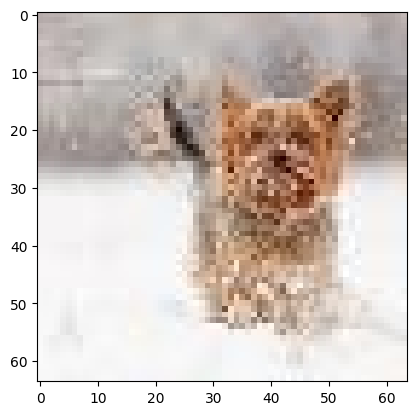

11764: 2.468482494354248


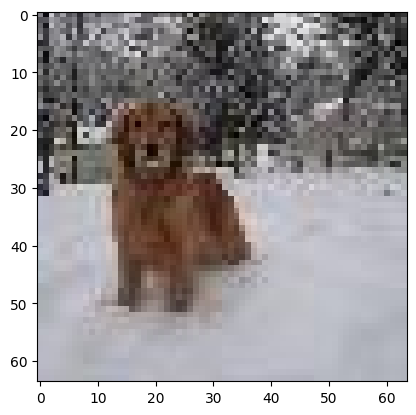

11922: 2.452643394470215


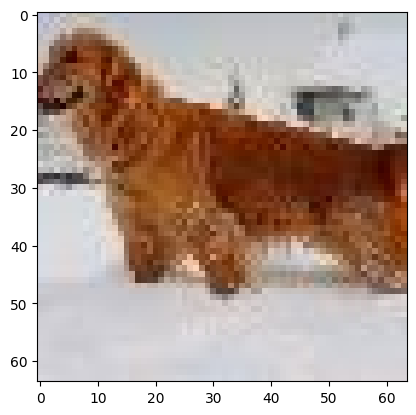

13283: 2.4261510372161865


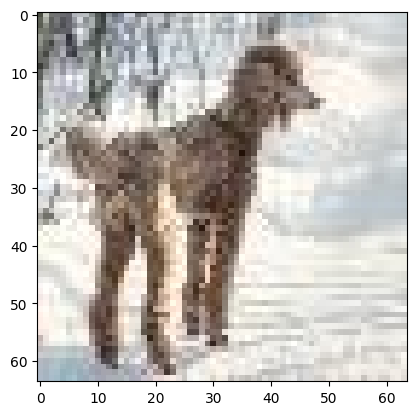

11576: 2.4226508140563965


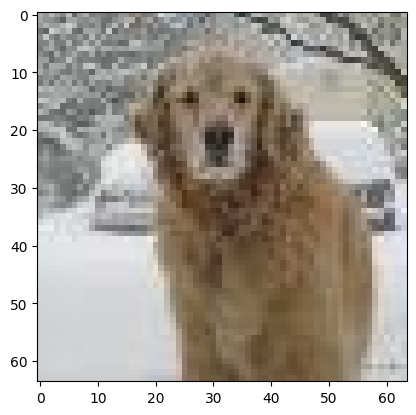

11926: 2.4189846515655518


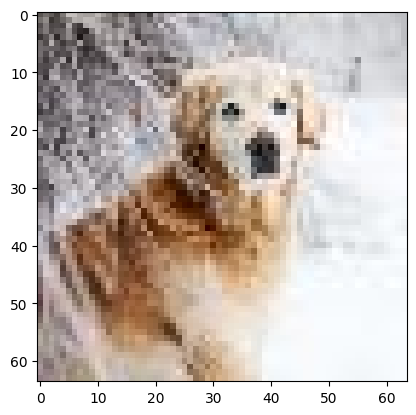

11690: 2.4126081466674805


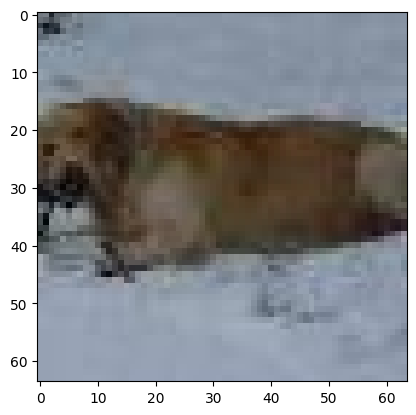

12725: 2.411526679992676


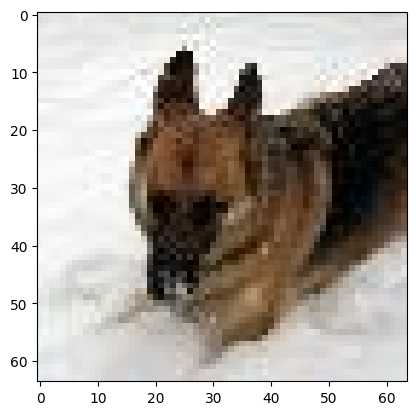

12715: 2.405412435531616


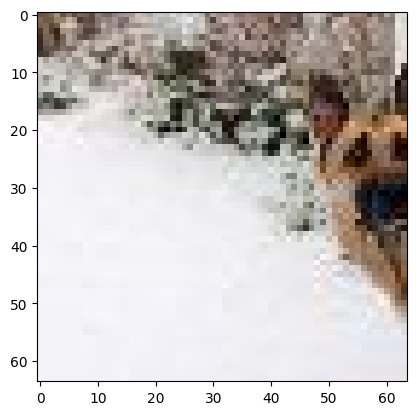

11433: 2.3820619583129883


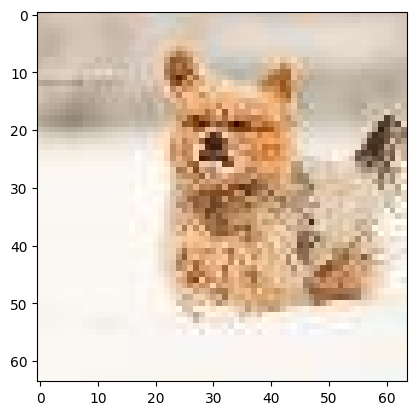

In [20]:
import matplotlib.pyplot as plt

# display the results
for i in idx:
    print(f"{i}: {scores[0][i]}")
    plt.imshow(images[i], cmap="gray")
    plt.show()

In [21]:
df = dataset["train"].to_pandas()
df = df.drop(columns=["image"])
df

,label,image_filepath
0,0,./saved_images_tiny-imagenet/0_0.jpg
1,0,./saved_images_tiny-imagenet/0_0.jpg
2,0,./saved_images_tiny-imagenet/0_0.jpg
3,0,./saved_images_tiny-imagenet/0_0.jpg
4,0,./saved_images_tiny-imagenet/0_0.jpg
...,...,...
99995,199,./saved_images_tiny-imagenet/199_199.jpg
99996,199,./saved_images_tiny-imagenet/199_199.jpg
99997,199,./saved_images_tiny-imagenet/199_199.jpg
99998,199,./saved_images_tiny-imagenet/199_199.jpg


In [22]:
image_arr.shape

(512, 100000)

In [23]:
df["img_emb"] = image_arr.T.tolist()
df

,label,image_filepath,img_emb
0,0,./saved_images_tiny-imagenet/0_0.jpg,"[0.01172823365777731, -0.026796868070960045, -..."
1,0,./saved_images_tiny-imagenet/0_0.jpg,"[0.02749764360487461, -0.0050798202864825726, ..."
2,0,./saved_images_tiny-imagenet/0_0.jpg,"[0.03566882014274597, -0.03651132807135582, 0...."
3,0,./saved_images_tiny-imagenet/0_0.jpg,"[0.032195307314395905, -0.0019664026331156492,..."
4,0,./saved_images_tiny-imagenet/0_0.jpg,"[0.0068870666436851025, -0.022202473133802414,..."
...,...,...,...
99995,199,./saved_images_tiny-imagenet/199_199.jpg,"[0.03998012840747833, 0.00616408558562398, 0.0..."
99996,199,./saved_images_tiny-imagenet/199_199.jpg,"[0.0238253902643919, 0.021452071145176888, -0...."
99997,199,./saved_images_tiny-imagenet/199_199.jpg,"[0.0488538034260273, 0.0305243581533432, -0.02..."
99998,199,./saved_images_tiny-imagenet/199_199.jpg,"[0.010644450783729553, 0.020221268758177757, -..."


In [24]:
from sqlalchemy import create_engine

engine = create_engine("postgresql+psycopg://pokemon_user@localhost:5432/pokemon_db")
df.to_sql("pokemons", engine, if_exists="replace", index=False)

-1